# Research Notebook
Lukas Lehmann (Student) <br>
Date: Feb. 03 - Feb. 16


# 1: Experience
## Describe at least one research activity you worked on this week. 

### 1: Experience
This time I have focussed on three different topics. I introduced a document with helper functions, revised the Draft_v2 document and programmed and used the improved metric.

## Motivation:

I created the document with helper functions mainly to display latex code more nicely and to define better symbolic functions. Overall, the better use of symbolic functions has been my goal for the whole week. Hence the changes to the draft document. The use of symbolic functions should allow for more analytical options and easier code checking.

Now we come to the improved metric. This is part of our main research focus and is therefore particularly interesting from a physical perspective. The aim here is to represent the metric presented in the paper https://arxiv.org/abs/2406.03909 in code and to compare it with the Schwarzscheld metric for different scenarios. The documents mentioned above will be used for this purpose.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.
### Helper Functions

First I wrote a document Helper.py to store all functions that are not really part of the draft. The content of the code looks like this (it should be mentioned that it is still a work in progress and comments are missing):

In [21]:
import numpy as np
import sympy as sp
from IPython.display import display, Math, Markdown


class SymbolWithValue(sp.Symbol):
    """
    A Symbol subclass that extends sympy.Symbol by allowing it to store a value.

    Parameters:
    - name: The name of the symbol.
    - default_value: An optional value for the symbol. Defaults to None.
    - kwargs: Any additional keyword arguments passed to sympy.Symbol constructor.
    """
    
    def __new__(cls, name, default_value=None, **kwargs):
        """
        Create a new SymbolWithValue object, which is a subclass of sympy.Symbol.
        
        This method ensures that the symbol is created and that a default value is attached if provided.
        
        Parameters:
        - name (str): The name of the symbol.
        - default_value (optional): The default value to associate with the symbol.
        - kwargs: Additional keyword arguments for sympy.Symbol constructor.
        
        Returns:
        - SymbolWithValue instance: A new instance of the class with the default value attached.
        """

        obj = sp.Symbol.__new__(cls, name, **kwargs)

        obj.value = default_value
        
        return obj

r=sp.Symbol('r')

class SymbolicFunction2(sp.Function):
    @classmethod
    def __new__(cls, expr, func, variables=[], dependence=[r], name='f', *args):
        obj = sp.Function.__new__(sp.Function, name)

        subs = {}
        for var in variables:
            if isinstance(var, SymbolWithValue) and var.value is not None:
                subs[var] = var.value  
            elif isinstance(var, sp.Symbol):
                subs[var] = var  

        safe = obj 
        obj = sp.Lambda(dependence, func.subs(subs))
        obj.sym = sp.simplify(sp.Lambda(dependence, func).args[1])
        obj.num = sp.lambdify(dependence, sp.Lambda(dependence, func.subs(subs)).args[1], "numpy")
        obj.f = safe

        return obj

def printTex(argument, Text=''):
    display(Math(fr'\begin{{align}} {Text} {sp.latex(argument)} \end{{align}}'))
    return

The following are examples of the individual functions of the code:

- Symbole with value

In [22]:
M = SymbolWithValue('M', 2)
print(f'Symbole: {M}')
print(f'Value: {M.value}')

Symbole: M
Value: 2


- Symbolic functions with stored values

In [34]:
x=sp.Symbol('x')

H = SymbolicFunction2(x**2+M, [M], (x), 'H')

display(Markdown(f'Function with inserted values for everything except variable: ${sp.latex(H)}$' ))
display(Markdown(f'Symbolic therm: ${sp.latex(H.sym)}$' ))
display(Markdown(f'Numeric function: ${sp.latex(H.num(x))}$, if a number is used instead of x in the code.' ))

Function with inserted values for everything except variable: $\left( x \mapsto x^{2} + 2 \right)$

Symbolic therm: $x^{2} + M$

Numeric function: $x^{2} + 2$, if a number is used instead of x in the code.

- More beautiful latex edition

In [35]:
printTex(M.value, f'{M}=')
printTex(H.sym, f'{H.f}=')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### dravt_v2

The changes to the draft document will not be discussed in detail here, as they are far from being finalised. However, a rough sketch of the desired result is provided. 

The idea is to use the newly implemented classes ‘SymbolWithValue’ and ‘SymbolicFunction2’ to represent a metric purely symbolically, but at the same time to have all the necessary parameters already stored in order to be able to perform numerical calculations directly. I am also looking for a method to exchange the parameters more efficiently in the functions without having to reinitialise all functions directly. 

The draft document is saved as a document in this git, as it is necessary for further calculations. Some of its functions will also become visible in the next section. 

### Improved metric

For the phsyical introduction of the improved metric I copy a part of my jupter notebook. These text passages can be found on our Github https://github.com/AdamSmithOrlik/quantum-black-holes in the folder Lukas, currently under reasearch.ipynb and in the future under Quantum_BH.ipynb.

**Introduction**

In the following section, the improved full-spacetime metric is defined/implemented in the code. Based on: https://arxiv.org/abs/2406.03909. In the following, all quoted equations are taken from this paper, unless another source is given.

**Variables**

The metric equations are depndend on four variables.
1. $M$ which refers to the mass of the BH (Blackhole).
2. $R_s=2MG$ which is the gravitational radius of the BH.
3. $Q_b$ which is a defined  quantitie to modifie the spacetime metric.
4. $Q_c$ which is also a defined  quantitie to modifie the spacetime metric.

In the first section of the code we define all these variables, and in the following sections of the code we define various functions that rely on $Q_b$ and $Q_c$. 

**Background of $Q_b$ and $Q_c$**

$Q_b$ and $Q_c$ are defined trough the following mathematical Form (compare eq. 4.19 - 4.20): 

\begin{align}Q_b&=|\beta_b|\gamma^2L_0^2 \\Q_c&=|\beta_c|\gamma^2L_0^6 \end{align}

where $\beta_b$ and $\beta_c$ are the so called GUP parameters and $\gamma$ is the Barbero-Immirzi parameter.

**Immirzi parameter**

"The Immirzi parameter measures the size of the quantum of area in Planck units." [https://en.wikipedia.org/wiki/Immirzi_parameter]. 

Its value is: 

\begin{align} \gamma=\begin{cases} \frac{\ln(2)}{\sqrt{3}\pi} \\\frac{\ln(3)}{\sqrt{8}\pi}\end{cases} \end{align}

Note: The way of choosing the Immirzi parameter recovers the Bekenstein-Hawking formula. (For more information, see the Wikipedia article linked above)

**GUP paramters $\beta_b$ and $\beta_c$**

The GUP parameters are used to generalise the uncertainty principle. More information can be found either in section 3.1 of https://arxiv.org/abs/2406.03909 or on Wikipedia https://en.wikipedia.org/wiki/Generalized_uncertainty_principle.

In [42]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sympy import latex
from IPython.display import display, Markdown
import matplotlib.colors as mcolors
from itertools import product
import draft_v2

In [153]:
# definig variables 
gamma = SymbolWithValue('gamma', np.log(2) / (np.sqrt(3) * np.pi))
beta_b, beta_c = SymbolWithValue('beta_b', 0), SymbolWithValue('beta_c', 0)
L_0 = SymbolWithValue('L_0', 5)
M = 1
r = sp.Symbol("r", nonnegative=True)

# definitions to calculate Q_b/c in dependence of beta and L_0 which gives us more possibilitys  to compare the influence of Q_b/c on different eq.

Q_b = SymbolicFunction2(abs(beta_b) * gamma ** 2 * L_0 ** 2, [gamma, L_0], beta_b, name='Q_b')
Q_c = SymbolicFunction2(abs(beta_c) * gamma ** 2 * L_0 ** 6, [gamma, L_0], beta_c, name='Q_c')

'''
-----------------------------------------------------------------------------------------------------------------------------------------------------
'''
display(Markdown("## Check definitons:"))

printTex(Q_b.sym, Text='Q_b=')
printTex(Q_c.sym, Text='Q_c=')

## Check definitons:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Improved full spacetime metric**

In the following we will impliment the Improved full spacetime metric tensor in the code using the following equations: 
\begin{align}
f(t)&=\left(1+\frac{Q_b}{r^2}\right)\cdot\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{-\frac{1}{4}}\cdot\left(1-\frac{R_s}{\sqrt{r^2+Q_b}}\right) \\
g(t)&=\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{\frac{1}{4}}\cdot\left(1-\frac{R_s}{\sqrt{r^2+Q_b}}\right)^{-1} \\
h(t)&=r^2\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{\frac{1}{4}}\\
\text{with: }&\text{diag}(-f,g,h, \sin^2(\theta)h)
\end{align}
[Compare eq. 4.25-4.27] 

In [154]:
R_s = 2*M

q_b, q_c = sp.Symbol('Q_b'), sp.Symbol('Q_c')
param= (q_b, q_c, L_0)

f = sp.Lambda((r, param), (1 + q_b / r**2) * (1 + q_c * (R_s)**2 / (4 * r**8))**(-1 / 4) * ( 1 - (R_s)/ sp.sqrt(r**2 + q_b )))
g = sp.Lambda((r, param), (1 + q_c * R_s**2 / (4 * r**8))**(1 / 4) * (1 - R_s / sp.sqrt(r**2 + q_b ))**(-1))
h = sp.Lambda((r, param), r**2 * (1 + q_c * R_s**2 / (4 * r**8))**(1 / 4))


'''
-----------------------------------------------------------------------------------------------------------------------------------------------------
'''
display(Markdown("## Check definitons:"))
printTex(f.expr, 'f=')
printTex(g.expr, 'g=')
printTex(h.expr, 'h=')

## Check definitons:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [155]:
Schwarzschield = draft_v2.MetricSystem(f, g, h, (beta_b.value, beta_c.value, L_0.value))
Impr = draft_v2.MetricSystem(f, g, h, (beta_b, beta_c, L_0))
BlackHole =  draft_v2.BH(M, [Schwarzschield, Impr], ['Schwarzschield', 'Impr'])

display(Markdown("## Check definitons:"))
display(Markdown("Schwarzschield:"))
~BlackHole.Schwarzschield()
printTex(BlackHole.Schwarzschield().line_element())
display(Markdown("Improved:"))
~BlackHole.Impr()

## Check definitons:

Schwarzschield:

$$\begin{align*}
    \eta{}_{t}{}_{t} &= -1 + \frac{2}{r} \\
    \eta{}_{r}{}_{r} &= \frac{1}{1 - \frac{2}{r}} \\
    \eta{}_{\theta}{}_{\theta} &= r^{2} \\
    \eta{}_{\phi}{}_{\phi} &= r^{2} \sin^{2}{\left(\theta \right)} 
\end{align*}$$

<IPython.core.display.Math object>

Improved:

$$\begin{align*}
    \eta{}_{t}{}_{t} &= - \frac{\left(1 + \frac{\beta_{b}}{r^{2}}\right) \left(1 - \frac{2}{\sqrt{r^{2} + \beta_{b}}}\right)}{\left(1 + \frac{\beta_{c}}{r^{8}}\right)^{0.25}} \\
    \eta{}_{r}{}_{r} &= \frac{\left(1 + \frac{\beta_{c}}{r^{8}}\right)^{0.25}}{1 - \frac{2}{\sqrt{r^{2} + \beta_{b}}}} \\
    \eta{}_{\theta}{}_{\theta} &= r^{2} \left(1 + \frac{\beta_{c}}{r^{8}}\right)^{0.25} \\
    \eta{}_{\phi}{}_{\phi} &= r^{2} \left(1 + \frac{\beta_{c}}{r^{8}}\right)^{0.25} \sin^{2}{\left(\theta \right)} 
\end{align*}$$

**Evaluation**

Now that the metric is defined, it's time to evaluate it. For a better graphical overview, I have come up with a colour-coded evaluation. Since $Q_b$ and $Q_c$ are values that vary between 0 and 1, I set the $Q_b$ value equal to the b value of rgb. This allows many functions to be evaluated at once.

In [156]:
grad=15
beta_b_list = np.linspace(0, 1/(gamma.value ** 2 * L_0.value ** 2), grad)
beta_c_list = np.linspace(0, 1/(gamma.value ** 2 * L_0.value ** 6), grad)

Q_list = (sp.lambdify(beta_b, Q_b.expr)(beta_b_list).tolist(), sp.lambdify(beta_c, Q_c.expr)(beta_c_list).tolist())

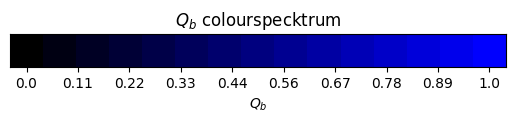

In [157]:
cartesian_product = list(product(Q_list[0], Q_list[1]))

rgb_values = np.array(cartesian_product).reshape(len(Q_list[0]), len(Q_list[1]), 2)

#green_values = rgb_values[:, :, 0]  
blue_values = rgb_values[:, :, 1] 

rgb_image = np.zeros((len(Q_list[0]), len(Q_list[1]), 3))  
rgb_image[:, :, 0] = 0
rgb_image[:, :, 1] = 0 
rgb_image[:, :, 2] = blue_values  

def color_spec(ax):
    ax.imshow(rgb_image)

    ax.set_ylim(4, 5)
    ax.set_xticks(np.linspace(0, len(Q_list[0])-1, 10), np.round(np.linspace(0, 1, 10), 2))
    ax.set_yticks([])

    ax.set_xlabel('$Q_b$')

    ax.set_title('$Q_b$ colourspecktrum')
    return ax
fig, ax = plt.subplots()
color_spec(ax)
plt.show()

In [158]:
V_eff_list = []
r_list = np.linspace(2*M,30*M, 1000)


for i in range(len(cartesian_product)):
    BlackHole.Impr.set_parameters((*cartesian_product[i],0))
    V_eff_list.append(BlackHole.Impr.V_eff(r_list, sigma=-1,L=3.7))

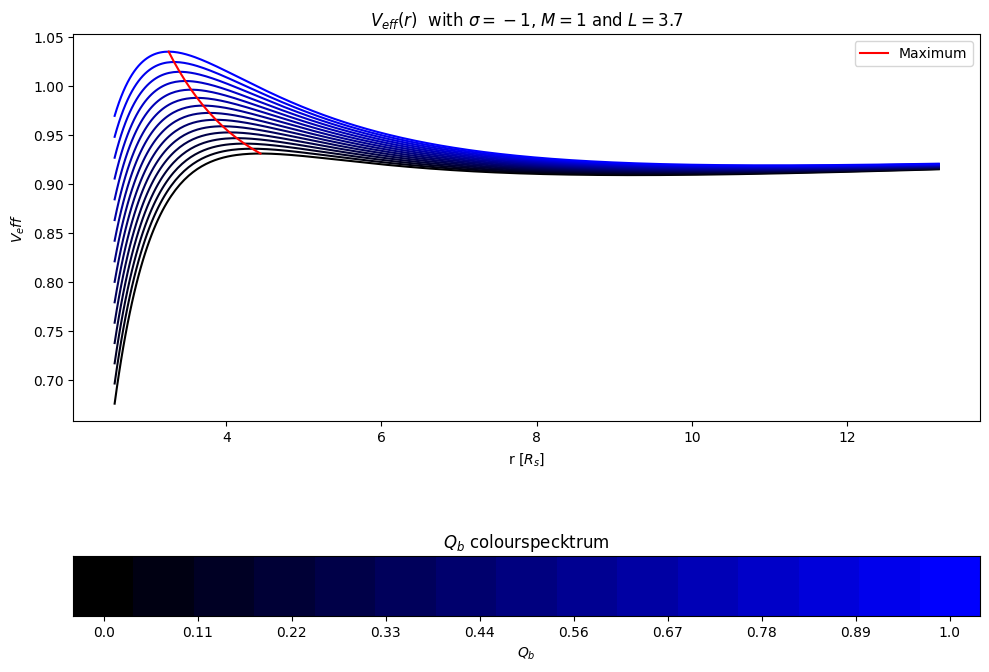

In [212]:
def Veff_plt(sigma=-1, L=1):

    V_eff_list = []
    r_list = np.linspace(2*M,30*M, 1000)
    points_x, points_y=[],[]

    for i in range(grad):
        BlackHole.Impr.set_parameters((*cartesian_product[i*grad],0))
        V_eff_list.append(BlackHole.Impr.V_eff(r_list, sigma=sigma,L=L))
        BlackHole.Impr.set_parameters((*cartesian_product[i*grad],0))
        min_store, max_store =BlackHole.Impr.min_max_V_eff(sigma=sigma,L=L)
        points_x.append(*max_store)
        points_y.append( BlackHole.Impr.V_eff(*max_store, sigma=sigma,L=L))
    
    fig = plt.figure(figsize=(10, 8))

    gs = fig.add_gridspec(2, 1) 

    V_plt = fig.add_subplot(gs[0, 0])  


    for i in range(grad):    
        b=cartesian_product[i*grad][0]
        if b>1:b=1
        V_plt.plot(r_list[20:400], V_eff_list[i][20:400], color=(0,0,b))

    V_plt.plot(points_x,points_y, color=(1,0,0),label='Maximum')
    V_plt.legend()

    V_plt.set_title(fr'$V_{{eff}}(r)$  with $\sigma={sigma}$, $M={M}$ and $L={L}$')

    V_plt.set_ylabel('$V_eff$')
    V_plt.set_xlabel('r [$R_s$]')

    spec = fig.add_subplot(gs[1, :])  
    color_spec(spec)


    plt.tight_layout()
    plt.show()

Veff_plt(L=3.7)


So far only $Q_b$ is changed, we want to make another 3d plot with $Q_c$ on the y axis to make it clear that the influence of $Q_C$ is of much less importance.

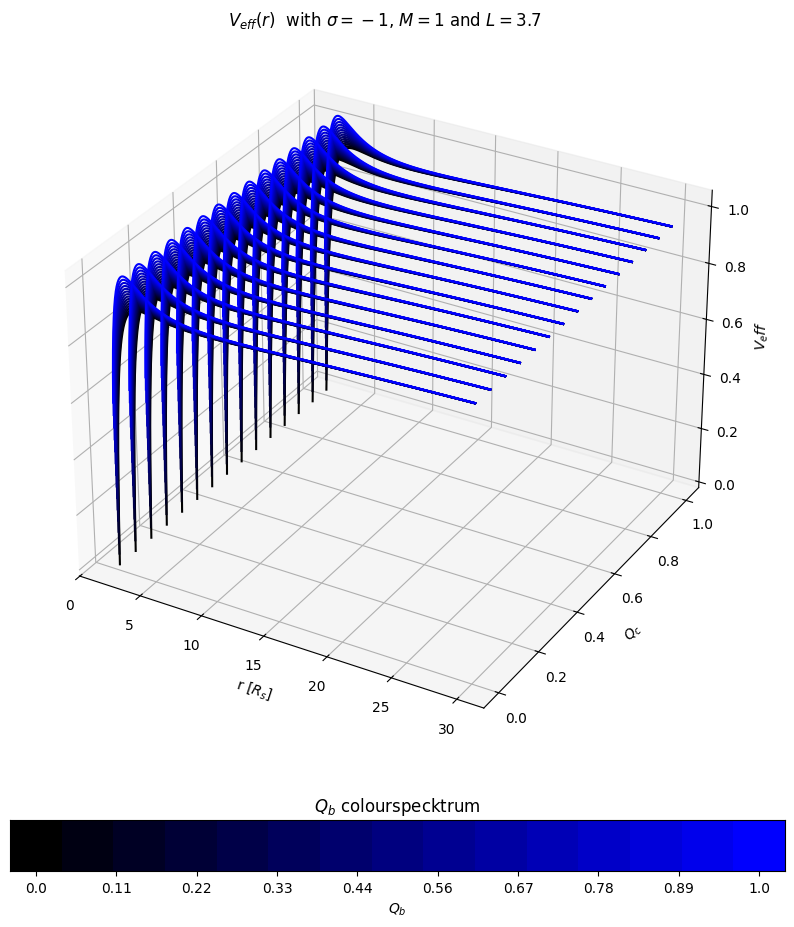

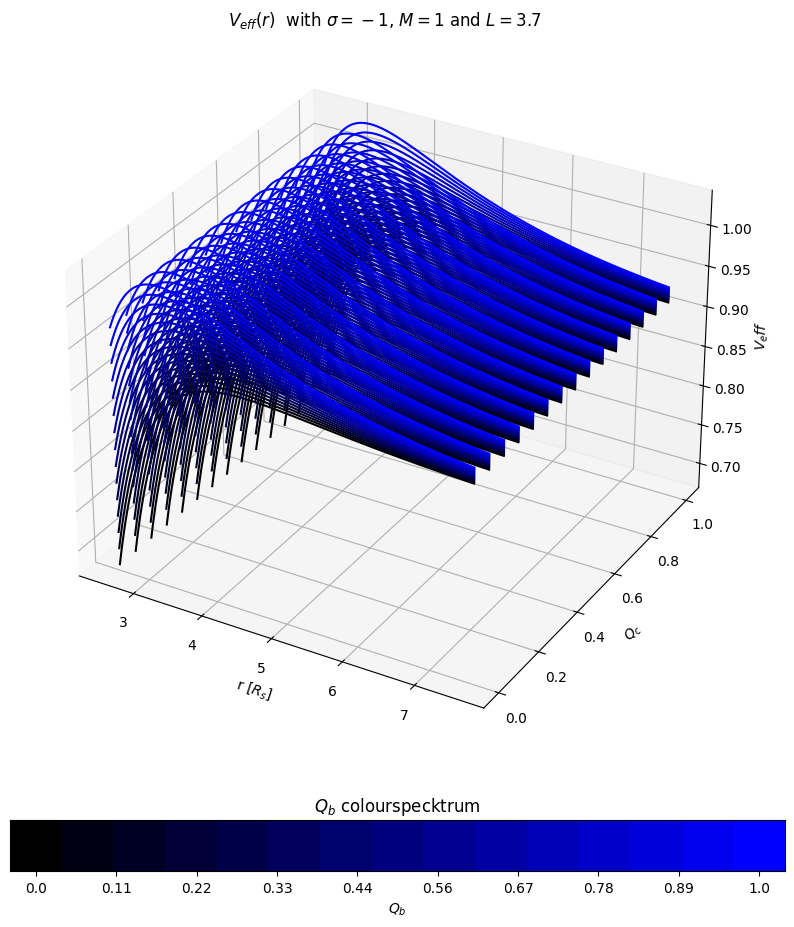

In [201]:
def Veff_3d(sigma=-1, L=1, width=[20,200]):
    V_eff_list = []
    r_list = np.linspace(2*M,30*M, 1000)

    for i in range(len(cartesian_product)):
        BlackHole.Impr.set_parameters((*cartesian_product[i],0))
        V_eff_list.append(BlackHole.Impr.V_eff(r_list, sigma=sigma,L=L))
    
    fig = plt.figure(figsize=(10,8))

    gs = fig.add_gridspec(2, 1) 

    V_plt = fig.add_axes([0.05, 0.4, 0.9, 0.9] ,projection='3d')

    for i in range(len(cartesian_product)):    
        b=cartesian_product[i][0]
        if b>1:b=1
        V_plt.plot(r_list[width[0]:width[1]], cartesian_product[i][1], V_eff_list[i][width[0]:width[1]], color=(0,0,b))
    V_plt.set_xlabel('r [$R_s$]')
    V_plt.set_ylabel('$Q_c$')
    V_plt.set_zlabel('$V_eff$')
    V_plt.view_init(elev=30, azim=-60)

    spec = fig.add_subplot(gs[1, :])  
    color_spec(spec)

    V_plt.set_title(fr'$V_{{eff}}(r)$  with $\sigma={sigma}$, $M={M}$ and $L={L}$')


    plt.show()

Veff_3d(L=3.7, width=[0,1000])
Veff_3d(L=3.7)

The assumption that $Q_c$ is significantly less relevant can be confirmed. The picture above is an example plot, with different weight settings and Ls the whole thing can be seen very well.

Comment on the following code:
The code is very inefficient and ugly, it will be replaced. It is only used to demonstrate the physical results.

In [254]:
def trPlot(r_0=5, sigma=-1, L=L_0.value, E=1.4, end=10):
    tau_span = [0, end]
    tau_list = np.linspace(tau_span[0], tau_span[1], 1000)

    t_p, r_p, phi_p, x_p, y_p = [], [], [], [], []
    t_n, r_n, phi_n, x_n, y_n = [], [], [], [], []

    for i in range(grad):
        BlackHole.Impr.set_parameters((*cartesian_product[i*grad],0)) 
        sp, sn, f = BlackHole.Impr.solve_DAE(tau_list, tau_span, r_0, sigma = sigma, L = L, E = E)

        t_p.append(sp[0])
        r_p.append(sp[1])
        phi_p.append(sp[2])

        x_p.append(r_p[i] * np.cos(phi_p[i]))
        y_p.append(r_p[i] * np.sin(phi_p[i]))

        t_n.append(sn[0])
        r_n.append(sn[1])
        phi_n.append(sn[2])

        x_n.append(r_n[i] * np.cos(phi_n[i]))
        y_n.append(r_n[i] * np.sin(phi_n[i]))

    fig = plt.figure(figsize=(16, 18))
    
    gs = fig.add_gridspec(2, 2)#, height_ratios=[1, 1]) 

    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1] ,projection='3d')

    ax1.set_aspect('equal', adjustable='box') 

    Phi_event_horizon = np.linspace(0, 2 * np.pi, 50)
    R__event_horizon = [2 * M] * len(Phi_event_horizon)

    for i in range(len(x_p)):
        b = cartesian_product[i * grad][0]
        if b > 1: b = 1
        ax1.plot(x_p[i], y_p[i], c=(0, 0, b))
        ax1.plot(x_n[i], y_n[i], c=(0, 0, b))

    ax1.fill_between(R__event_horizon * np.cos(Phi_event_horizon), R__event_horizon * np.sin(Phi_event_horizon), color='grey', label='event horizon')
    ax1.scatter(0, 0, c='black', label='center of BH')

    ax1.set_title('Trajectory of particle')
    ax1.set_xlabel('x [$R_s$]')
    ax1.set_ylabel('y [$R_s$]')
    ax1.legend()

    #ax2 = fig.add_subplot(122, projection='3d')

    for i in range(len(x_p)):
        b = cartesian_product[i * grad][0]
        if b > 1: b = 1
        ax2.plot(x_p[i], y_p[i], t_p[i], c=(0, 0, b))
        ax2.plot(x_n[i], y_n[i], t_n[i], c=(0, 0, b))

    ax2.set_title('3D Trajectory of particle')
    ax2.set_xlabel('x [$R_s$]')
    ax2.set_ylabel('y [$R_s$]')
    ax2.set_zlabel('t [$s$]')

    
    spec = fig.add_subplot(gs[1, :])  
    color_spec(spec)



    plt.tight_layout() 
    plt.show()

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))

    for i in range(len(x_p)):
        b = cartesian_product[i * grad][0]
        if b > 1: b = 1
        ax[2].plot(t_p[i], r_p[i], c= (0, 0, b))  
        ax[2].plot(t_n[i], r_n[i], c= (0, 0, b))  

    ax[2].set_title('r(t) of particle') 
    ax[2].set_xlabel('t')
    ax[2].set_ylabel('r [$R_s$]') 


    for i in range(len(x_p)):
        b = cartesian_product[i * grad][0]
        if b> 1: b = 1
        ax[0].plot(t_p[i], phi_p[i], c= (0, 0, b))  
        ax[0].plot(t_n[i], phi_n[i], c= (0, 0, b))  

    ax[0].set_title(rf'$\beta$(t) of particle') 
    ax[0].set_xlabel('t')
    ax[0].set_ylabel(rf'$\beta$') 

    for i in range(len(x_p)):
        b = cartesian_product[i * grad][0]

        if b > 1: b= 1

        ax[1].plot(r_p[i], phi_p[i], c= (0, 0, b))  
        ax[1].plot(r_n[i], phi_n[i], c= (0, 0, b))  

    ax[1].set_title(rf'$\beta$(r) of particle') 
    ax[1].set_xlabel('r')
    ax[1].set_ylabel(rf'$\beta$') 

    
    plt.show()

c:\Users\lukas\Documents\GitHub\research-journal-LukasLLW\draft_v2.py:277: RuntimeWarning: invalid value encountered in sqrt
  drdtau = delta * np.sqrt(argument.real)
c:\Users\lukas\Documents\GitHub\research-journal-LukasLLW\draft_v2.py:268: RuntimeWarning: divide by zero encountered in scalar divide
  dtdtau = delta * E / f(r)
<lambdifygenerated-12044>:2: RuntimeWarning: divide by zero encountered in scalar power
  return (1 - 2/sqrt(r**2 + 0.285714285714286))**(-1.0)
c:\Users\lukas\Documents\GitHub\research-journal-LukasLLW\draft_v2.py:270: RuntimeWarning: divide by zero encountered in scalar divide
  argument = 1 / g(r) * ((E ** 2) / f(r) + sigma - (L ** 2) / h(r))
c:\Users\lukas\Documents\GitHub\research-journal-LukasLLW\draft_v2.py:270: RuntimeWarning: invalid value encountered in scalar multiply
  argument = 1 / g(r) * ((E ** 2) / f(r) + sigma - (L ** 2) / h(r))
<lambdifygenerated-12047>:2: RuntimeWarning: divide by zero encountered in scalar power
  return (1 - 2/sqrt(r**2 + 0.3

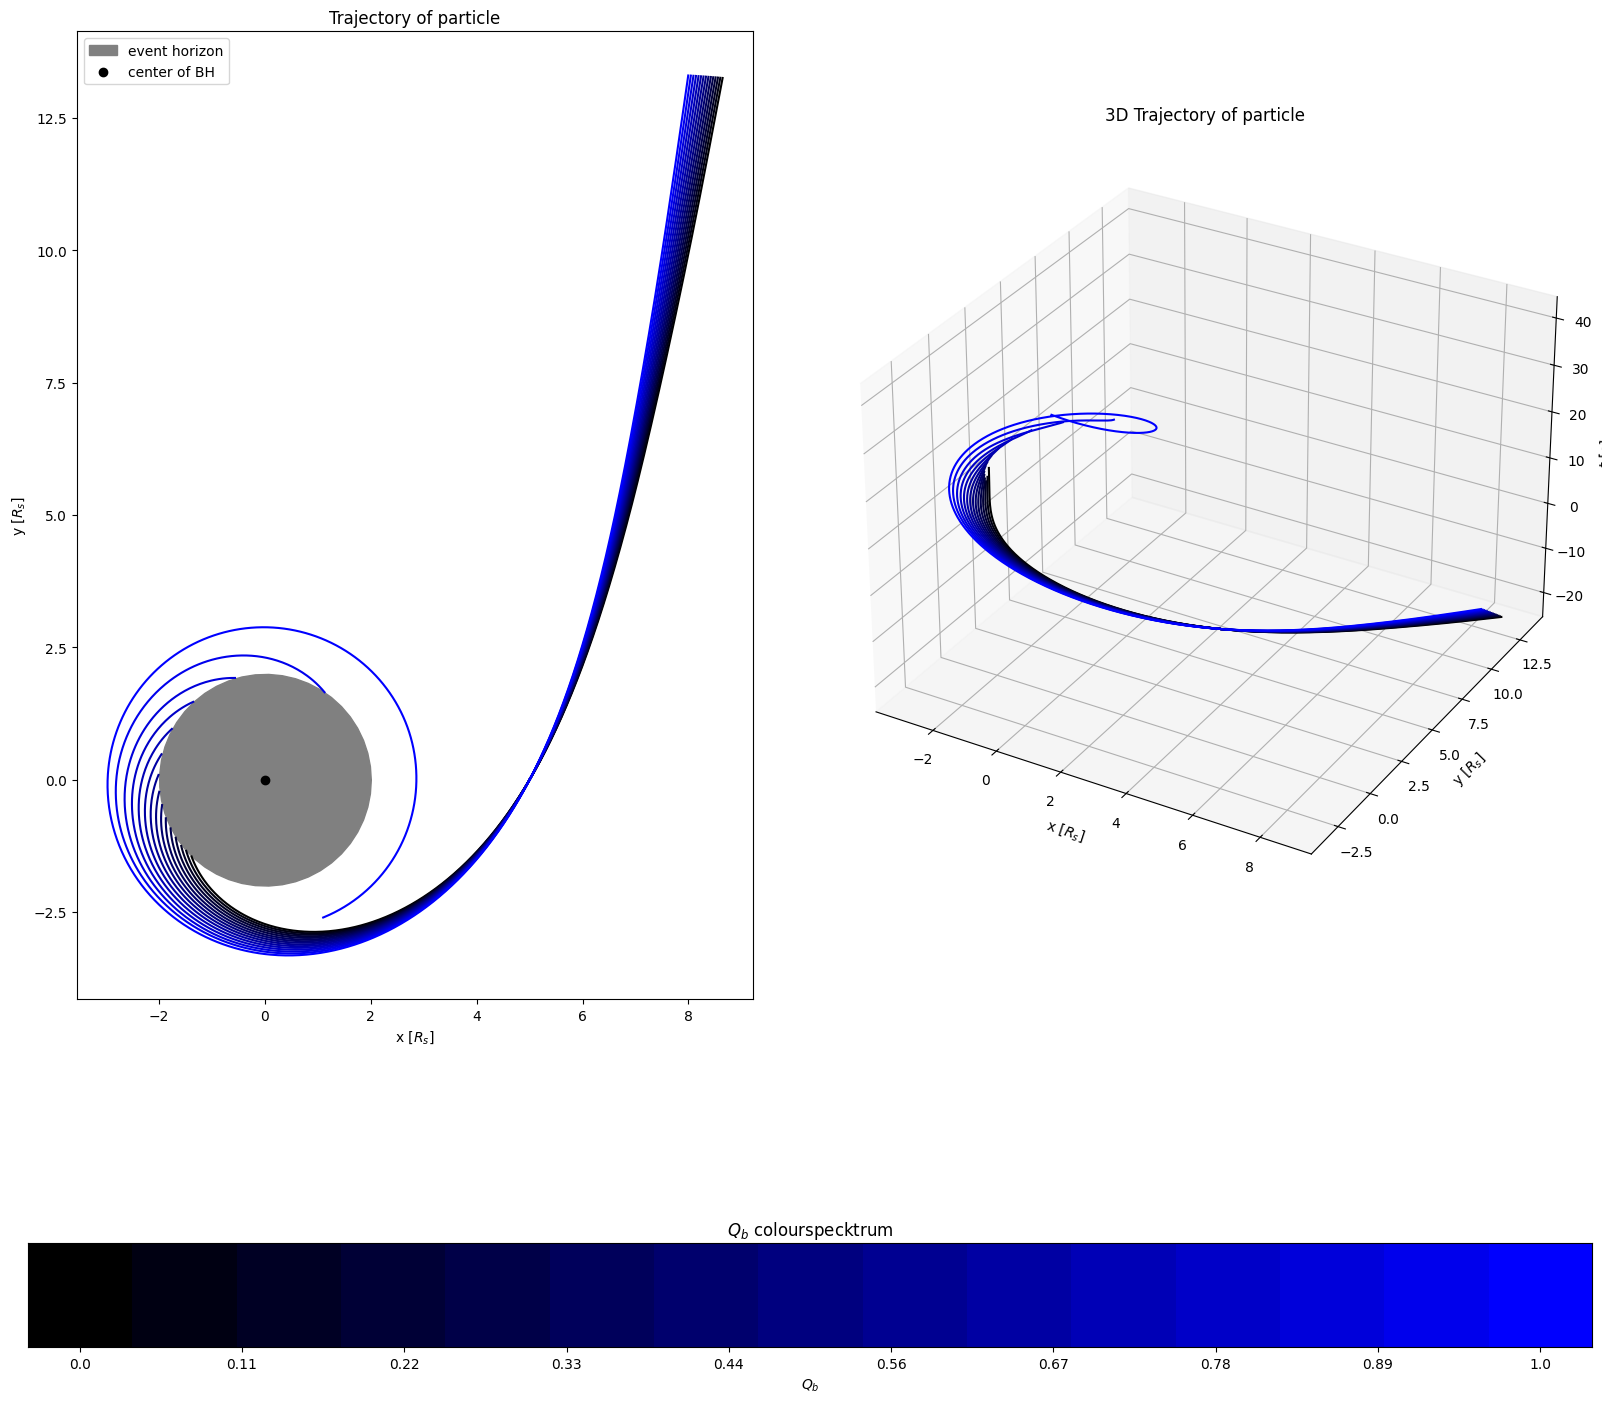

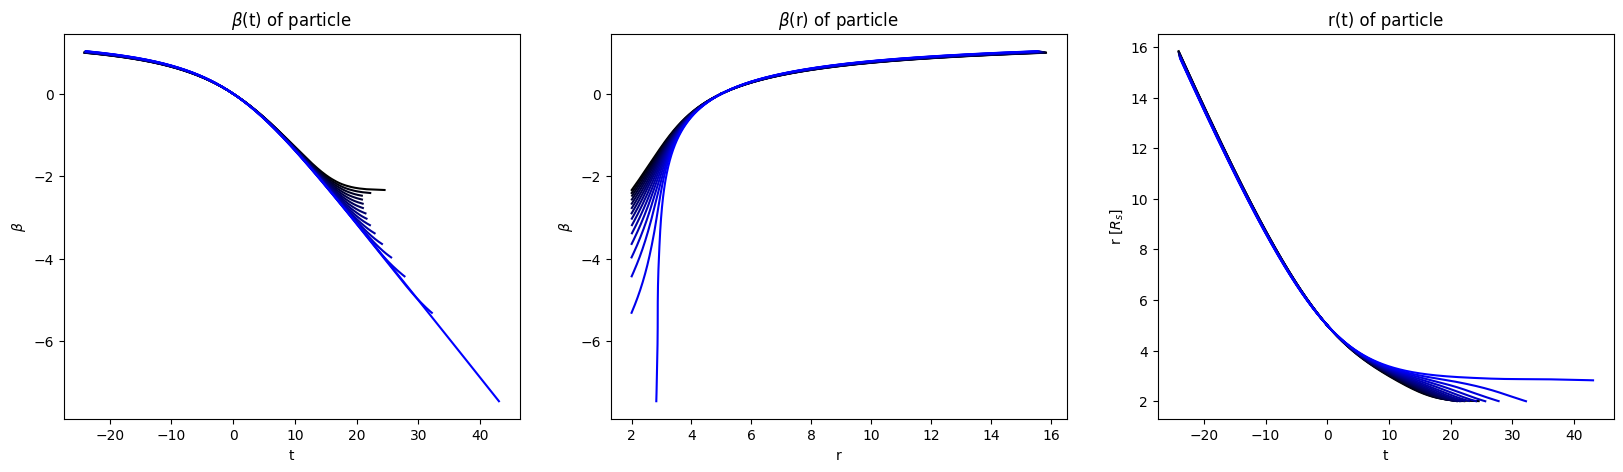

In [255]:
trPlot(E=-1.244, end=15)

c:\Users\lukas\Documents\GitHub\research-journal-LukasLLW\draft_v2.py:277: RuntimeWarning: invalid value encountered in sqrt
  drdtau = delta * np.sqrt(argument.real)


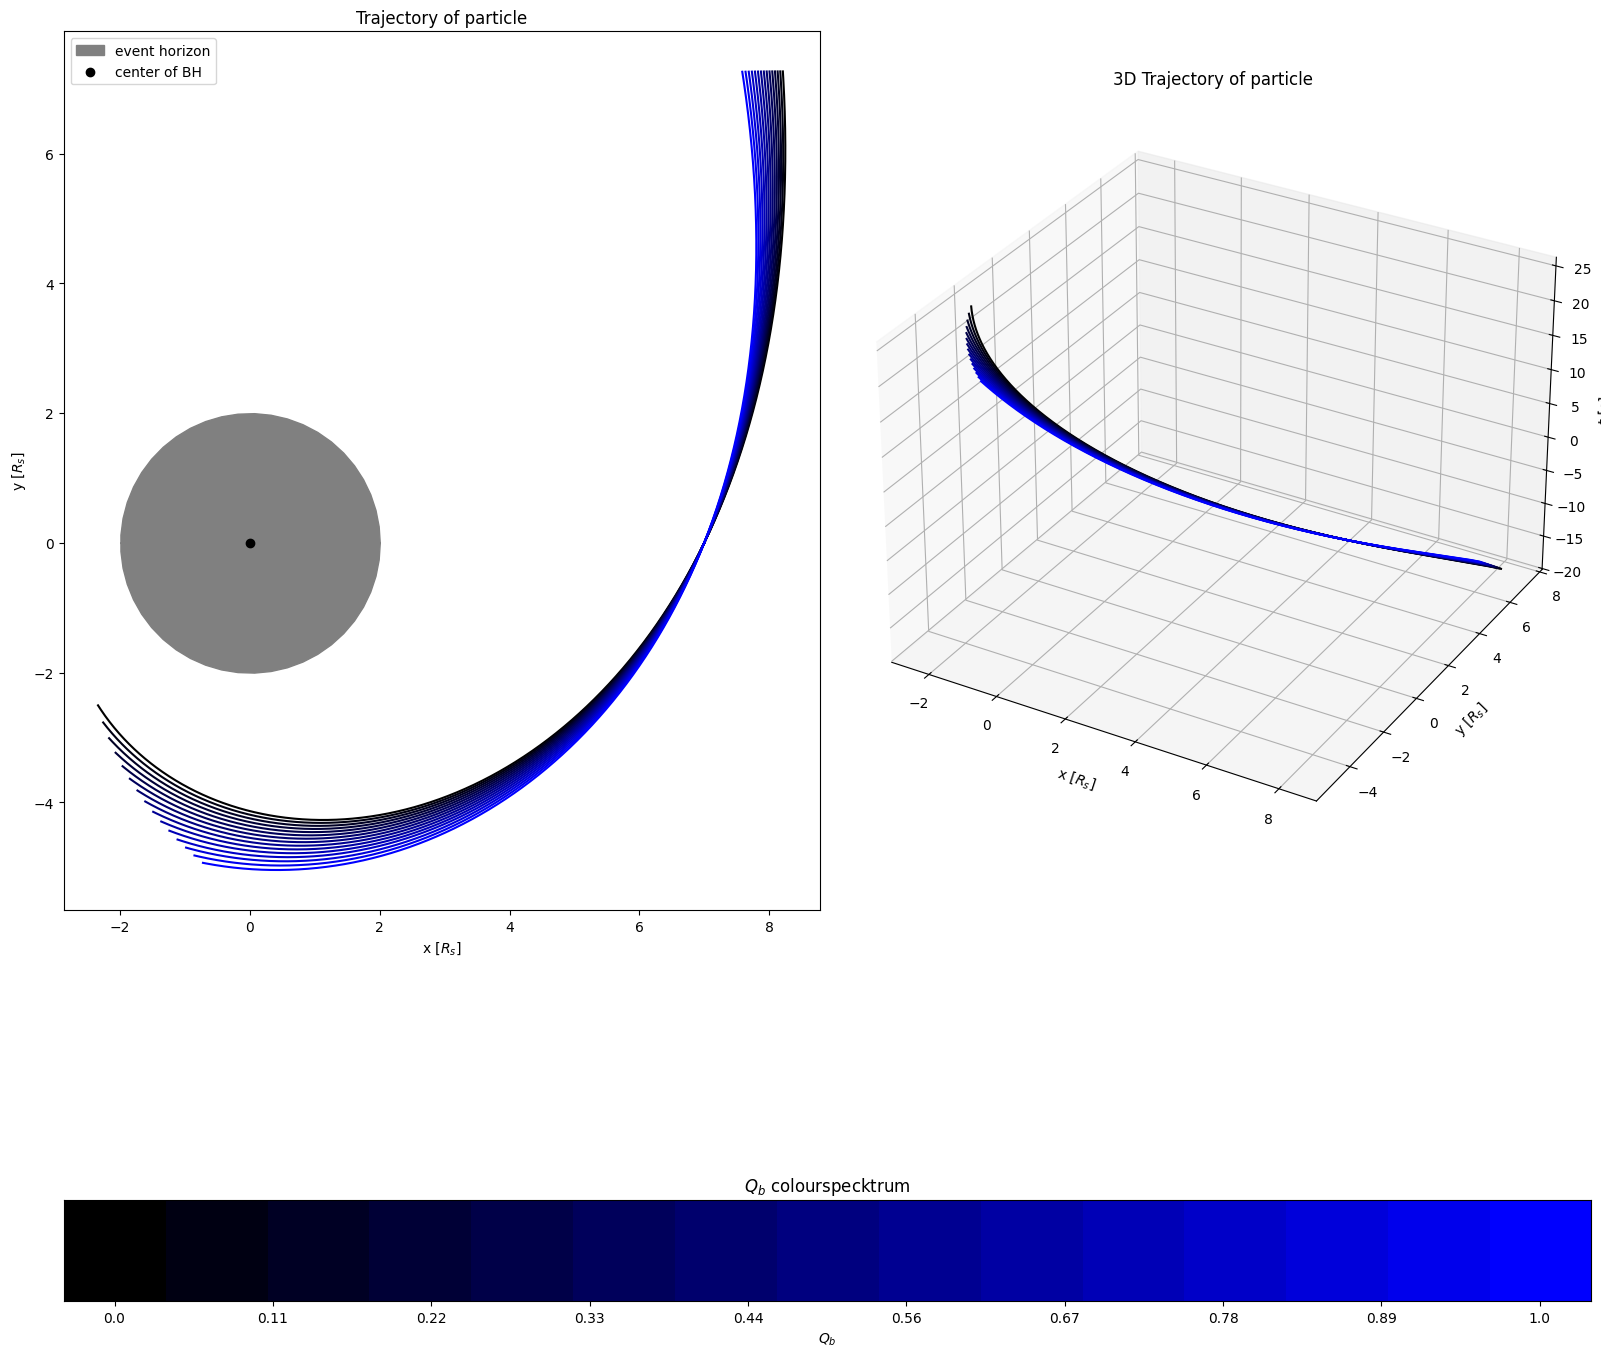

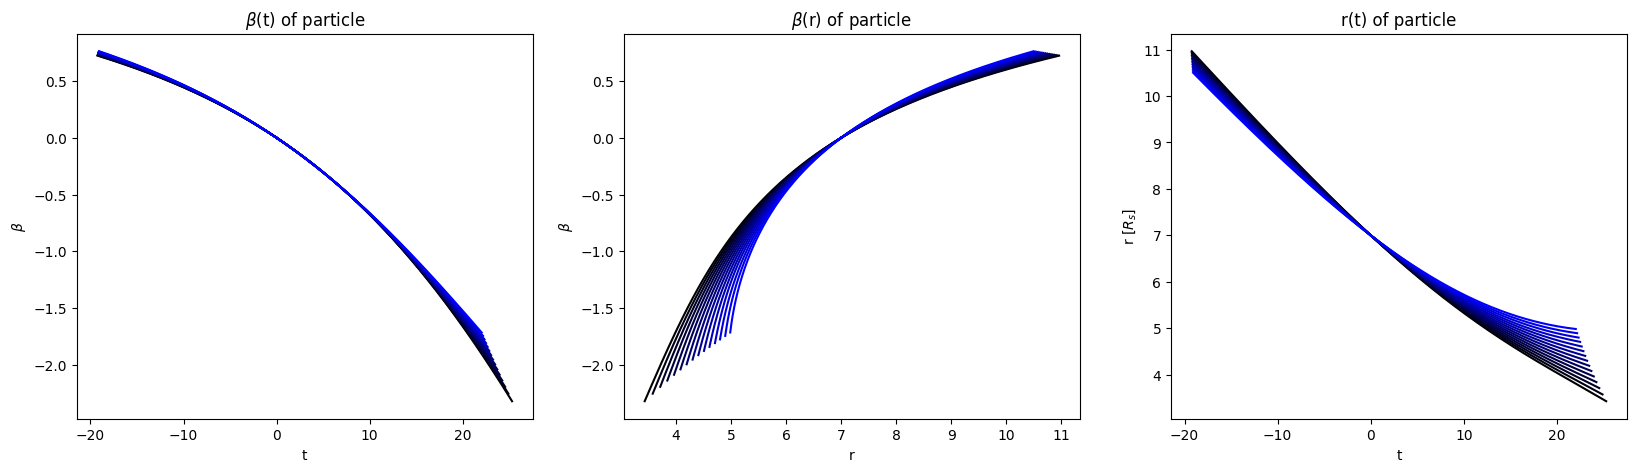

In [256]:
trPlot(E=-0.99, end=15, L=3.7, r_0=7)

# 3: So what? (What does it mean?)
## Describe your results

As already mentioned, the colourspectrum is used to display different $Q_b$ values. Thus we can see from the graphs how much the improved metric influences the result. The black curve is always the Schwarzschield solution. In addition, we have seen anectotically that the influence of $Q_c$ can initially be neglected. We also see that the behaviour becomes more extreme the closer the particle gets to the black hole. Furthermore, a maximum shift in $V_{eff}$ can be observed for increasing $Q_b$.


# 4. Now what? (What's next?)
## Plan for the next week

It is planned to first fix existing bugs, such as missing minima display, etc.. Secondly, it is planned to finalise the symbolic representation and to improve and embellish the code (comments, etc.). and finally, it is planned to investigate the results further, i.e. to find good parameters and to ensure that certain results are not caused by code errors, but actually look like this. 